In [1]:
from datascience import *
import numpy as np
import csv

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

nonscaled: 3 - danceability, 4 - energy, 7 - mode, 8 - speechiness, 9 - acousticness, 10 - instrumentalness, 11 - liveness, 12 - valence

scaled: 5 - key, 6 - loudness, 13 - tempo, 14 - duration_ms, 15 - time_signature

In [2]:
years = [2012, 2013, 2014, 2015, 2016]
scaled = [5, 6, 13, 14, 15]
nonscaled = [3, 4, 7, 8, 9, 10, 11, 12]

In [3]:
maxim = [None, None, None, None, None, 0, 0, None, None, None, None, None, None, 0, 0, 0]
minim = [None, None, None, None, None, 0, 0, None, None, None, None, None, None, 0, 0, 0]
for year in years:
    d = Table().read_table("../data/cleandata/top_songs_" + str(year) + ".csv")
    for i in scaled:
        if min(d.column(i)) < minim[i]:
            minim[i] = min(d.column(i))
        if max(d.column(i)) > minim[i]:
            maxim[i] = max(d.column(i))

In [4]:
def nonscaled_attribute(year):
    d = Table().read_table("../data/cleandata/top_songs_" + str(year) + ".csv")
    features = [year]
    for c in nonscaled:
        features += [np.mean(d.column(c))]
    return features

In [5]:
def scale_attribute(year):
    d = Table().read_table("../data/cleandata/top_songs_" + str(year) + ".csv")
    features = [year]
    for c in scaled:
        col = (d.column(c) - minim[c]) / (maxim[c] - minim[c])
        features += [np.mean(col)]
    return features

In [6]:
mean_data = Table().with_columns("year", [],
                     "danceability", [],
                     "energy", [],
                     "mode", [],
                     "speechiness", [],
                     "acousticness", [],
                     "instrumentalness", [],
                     "liveness", [],
                     "valience", [])
for year in years:
    mean_data = mean_data.with_row(nonscaled_attribute(year))
mean_data

year,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valience
2012,0.65165,0.73668,0.63,0.086123,0.111053,0.00255943,0.189717,0.56075
2013,0.63636,0.70664,0.68,0.074624,0.12694,0.00633062,0.170676,0.518695
2014,0.65464,0.69486,0.68,0.080718,0.138457,0.00649905,0.167796,0.524177
2015,0.65334,0.65451,0.62,0.093221,0.17243,0.000844622,0.184377,0.496832
2016,0.66189,0.628465,0.5,0.119507,0.180886,0.00438409,0.176729,0.451382


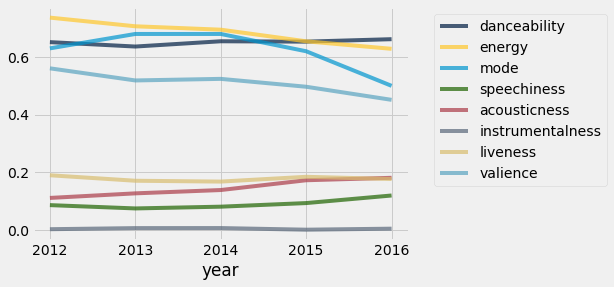

In [7]:
mean_data.plot("year")

In [8]:
mean_scale_data = Table().with_columns("year", [],
                    "key", [],
                    "loudness", [],
                    "tempo", [],
                    "duration_ms", [],
                    "time_signature", [],)
for year in years:
    mean_scale_data = mean_scale_data.with_row(scale_attribute(year))
mean_scale_data

year,key,loudness,tempo,duration_ms,time_signature
2012,0.446364,0.841923,0.661706,0.714699,0.796
2013,0.459091,0.815715,0.639889,0.728444,0.802
2014,0.526364,0.823249,0.633674,0.723147,0.798
2015,0.465455,0.7907,0.660749,0.700232,0.798
2016,0.542727,0.760134,0.634325,0.705,0.794


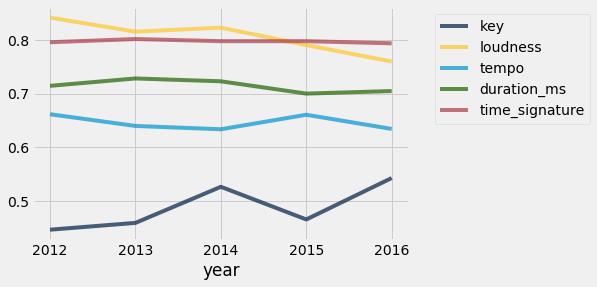

In [9]:
mean_scale_data.plot("year")